> # **Word Embedding**
- Mikolov et al., 2013 — Efficient Estimation of Word Representations

Core innovations:
- Negative Sampling
- Hierarchical Softmax
- Efficient training using shallow neural network

Modern Context:
- Word2Vec → Static embeddings
- FastText → Subword information
- GloVe → Matrix factorization

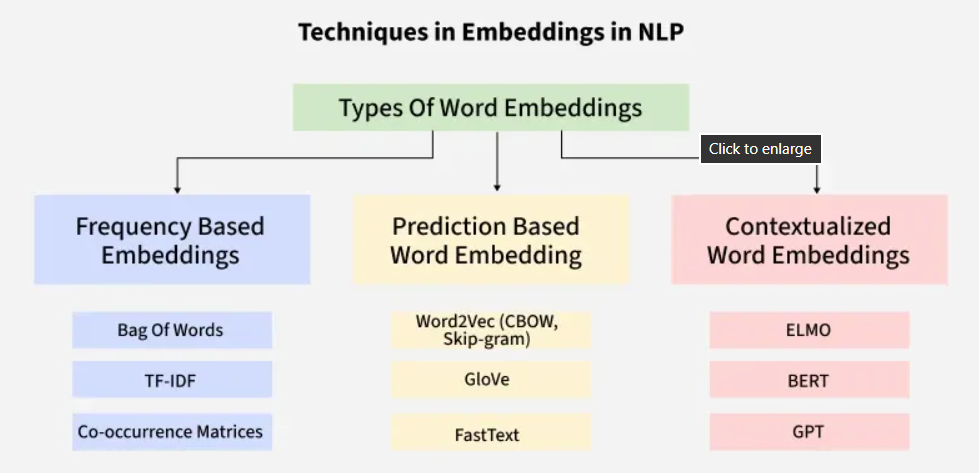

In [9]:
# import the libraries
!pip install gensim nltk

import spacy
import gensim
from gensim.models import Word2Vec

!python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
# Text Preprocessing
corpus = [
    "Natural language processing is fun",
    "Word2Vec creates word embeddings",
    "Machine learning models learn patterns",
    "Deep learning is a part of machine learning",
    "Gensim library provides Word2Vec implementation"
]

# Re-initialize docs as nlp.pipe is an iterator that gets consumed
processed_docs = nlp.pipe(corpus)

# Create a list of lists, where each inner list is a tokenized sentence
# Convert to lowercase and filter for alphabetic tokens for better embedding quality
tokenized_words = [[token.text.lower() for token in doc if token.is_alpha] for doc in processed_docs]

# Print the first few tokenized sentences to show the new structure
print(tokenized_words[:3])

[['natural', 'language', 'processing', 'is', 'fun'], ['creates', 'word', 'embeddings'], ['machine', 'learning', 'models', 'learn', 'patterns']]


> ## Parameter	Meaning:
- vector_size  ----   Dimension of embedding
- window	     ----   Context window size
- min_count	   ----   Ignore words below frequency
- sg=0	       ----   CBOW
- sg=1	       ----   Skip-Gram
- epochs	     ----   Number of training iterations

> ## **Method 1 — CBOW (Continuous Bag of Words)**
- CBOW predicts the target word from surrounding context words.

- Example:
  - Context → Target
  - "natural language ___ is fun" → "processing"

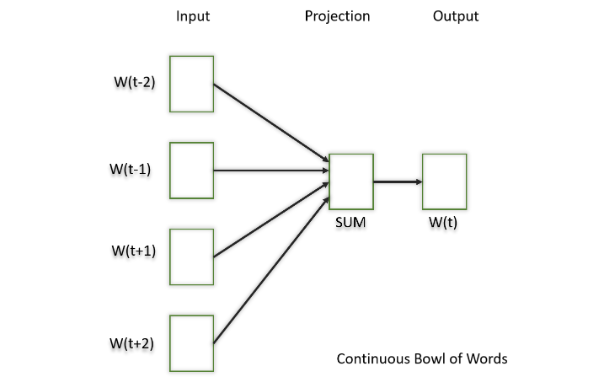

In [13]:
cbow_model = Word2Vec(
    sentences = tokenized_words,
    vector_size = 100,
    window = 5,
    min_count=1,
    sg=0                     # 0 = CBOW
)

# Access the vectors
vector = cbow_model.wv['learning']
print("vector:", vector)

# Most similar words
similar_words = cbow_model.wv.most_similar('learning')
print("similar_words:", similar_words)

# word similarity score
cbow_model.wv.similarity('machine', 'learning')

vector: [-5.3692696e-04  2.3995443e-04  5.1059835e-03  9.0092216e-03
 -9.3019726e-03 -7.1186139e-03  6.4609013e-03  8.9739859e-03
 -5.0171344e-03 -3.7642012e-03  7.3827803e-03 -1.5376294e-03
 -4.5340536e-03  6.5522096e-03 -4.8584682e-03 -1.8156150e-03
  2.8760363e-03  9.9128589e-04 -8.2850354e-03 -9.4514601e-03
  7.3126825e-03  5.0727641e-03  6.7595933e-03  7.6002325e-04
  6.3489839e-03 -3.4041393e-03 -9.4727339e-04  5.7663680e-03
 -7.5195772e-03 -3.9386307e-03 -7.5126854e-03 -9.3183201e-04
  9.5404405e-03 -7.3160352e-03 -2.3337514e-03 -1.9355628e-03
  8.0787502e-03 -5.9292130e-03  4.4375971e-05 -4.7540609e-03
 -9.6019544e-03  5.0067194e-03 -8.7601217e-03 -4.3893489e-03
 -3.5226694e-05 -2.9628092e-04 -7.6632546e-03  9.6139200e-03
  4.9805120e-03  9.2320647e-03 -8.1584472e-03  4.4965968e-03
 -4.1360441e-03  8.2362478e-04  8.5000861e-03 -4.4628475e-03
  4.5194705e-03 -6.7866729e-03 -3.5452566e-03  9.3992883e-03
 -1.5813344e-03  3.1845225e-04 -4.1392082e-03 -7.6822573e-03
 -1.5095412e-03 

np.float32(-0.010812465)

> ## **Method 2 — Skip-Gram**
- Skip-gram predicts surrounding words from the target word.

- Example:
  - Target → Context
  - "processing" → "natural", "language", "is", "fun"


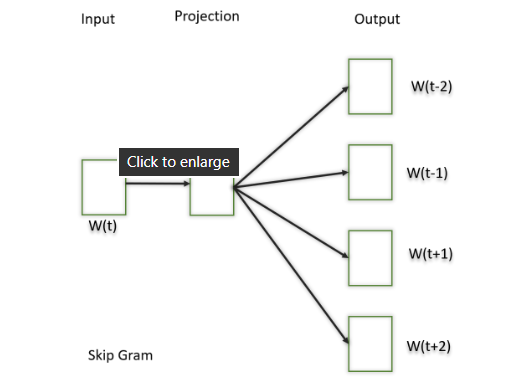

In [14]:
skipgram_model = Word2Vec(
    sentences = tokenized_words,
    vector_size = 100,
    window = 5,
    min_count = 1,
    sg = 1                  # 1 = Skip-Gram
)

skipgram_model.wv.most_similar('learning')

[('creates', 0.21879246830940247),
 ('a', 0.21618445217609406),
 ('learn', 0.09312605857849121),
 ('of', 0.09291943907737732),
 ('natural', 0.08405012637376785),
 ('patterns', 0.07970760017633438),
 ('deep', 0.06316834688186646),
 ('word', 0.05441296100616455),
 ('part', 0.027566518634557724),
 ('gensim', 0.016144583001732826)]

## CBOW
> fast, good for large datasets and smooth representation

## Skip-Gram
> slower, good for small datasets and better rare word representation

In [ ]:
# save and load model
cbow_model.save("cbow_model.model")
skipgram_model.save("skipgram_model.model")

# Load
model = Word2Vec.load("cbow_model.model")

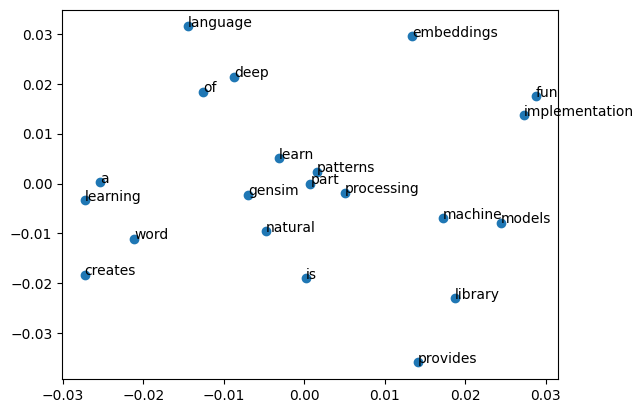

In [16]:
# Visualization (Optional – 2D Projection) for CBOW

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(cbow_model.wv.index_to_key)[:50]
vectors = [cbow_model.wv[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure()
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

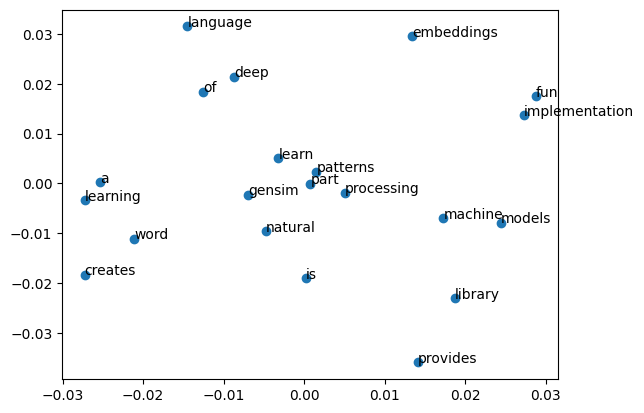

In [18]:
# Visualization (Optional – 2D Projection) Skip-Gram

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(skipgram_model.wv.index_to_key)[:50]
vectors = [skipgram_model.wv[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure()
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()